In [138]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# 1. Data opening

> In this first part, we open all files of the database and add headers of each table. Headers were found in the *Readme* of thE *CMU Movie Summary Corpus* study (http://www.cs.cmu.edu/~ark/personas/).

## *1.2 Characters*

In [139]:
characters_df = pd.read_csv('/home/sara/Dropbox/epfl/master/MA1/ADA/project/data/MovieSummaries/character.metadata.tsv', sep='\t', header=None)
characters_df.reset_index(drop=True, inplace=True)

characters_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [140]:
# Adding column names after reading the file
characters_df.columns = ['Wikipedia_movie_ID', 'Freebase_Movie_ID', 'Movie_release_date', 'Character_name', 'Actor_date_of_birth', 'Actor_gender', 'Actor_height','Actor_ethnicity',
                         'Actor_name', 'Actor_age_at_movie_release','Freebase_character/actor_map_ID','Freebase_character_ID','Freebase_actor_ID']

In [141]:
characters_df

,Wikipedia_movie_ID,Freebase_Movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


## *1.2 Movies*

In [142]:
movies_df = pd.read_csv('/home/sara/Dropbox/epfl/master/MA1/ADA/project/data/MovieSummaries/movie.metadata.tsv', sep='\t', header=None)
movies_df.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [143]:
# Adding column names after reading the file
movies_df.columns = ['Wikipedia_movie_ID', 'Freebase_Movie_ID', 'Movie_name', 'Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime', 'Movie_languages','Movie_countries',
                         'Movie_genres']

movies_df

,Wikipedia_movie_ID,Freebase_Movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


## *1.3 Name cluster*

In [144]:
path_name_cluster = '/home/sara/Dropbox/epfl/master/MA1/ADA/project/data/MovieSummaries/name.clusters.txt'
name_cluster_df = pd.read_csv(path_name_cluster, delimiter='\t', header=None)
name_cluster_df.columns = ['unique_character_name', 'freebase_actor_id']

print(name_cluster_df.head())

  unique_character_name freebase_actor_id
0         Stuart Little         /m/0k3w9c
1         Stuart Little         /m/0k3wcx
2         Stuart Little         /m/0k3wbn
3              John Doe         /m/0jyg35
4              John Doe         /m/0k2_zn


## *1.4 Plot summary*

In [145]:
# Read the txt file by specifying the delimiter (here, a tabulation)^
path_plot = '/home/sara/Dropbox/epfl/master/MA1/ADA/project/data/MovieSummaries/plot_summaries.txt'
plot_summary_df = pd.read_csv(path_plot, delimiter='\t', header=None)
plot_summary_df.columns = ['movie_id', 'plot_summary']

# Print first 5 rows of the dataframe
print(plot_summary_df.head())

             movie_id                                       plot_summary
0  Wikipedia movie ID                                     Plot summaries
1            23890098  Shlykov, a hard-working taxi driver and Lyosha...
2            31186339  The nation of Panem consists of a wealthy Capi...
3            20663735  Poovalli Induchoodan  is sentenced for six yea...
4             2231378  The Lemon Drop Kid , a New York City swindler,...


## *1.5 TV tropes cluster*

In [146]:
path_name_cluster = '/home/sara/Dropbox/epfl/master/MA1/ADA/project/data/MovieSummaries/tvtropes.clusters.txt'
tv_tropes_df = pd.read_csv(path_name_cluster, delimiter='\t', header=None)
tv_tropes_df.columns = ['character_types', 'ID_field']

print(tv_tropes_df.head())


           character_types                                           ID_field
0  absent_minded_professor  {"char": "Professor Philip Brainard", "movie":...
1  absent_minded_professor  {"char": "Professor Keenbean", "movie": "Richi...
2  absent_minded_professor  {"char": "Dr. Reinhardt Lane", "movie": "The S...
3  absent_minded_professor  {"char": "Dr. Harold Medford", "movie": "Them!...
4  absent_minded_professor  {"char": "Daniel Jackson", "movie": "Stargate"...


# 2. First statistical analysis

> In this second part, we want to do the first statistical analysis that would help us to correctly understand the size and the content of the database. This is crucial in order to correctly orient our project.

## *2.1 General understanding of database size*

In [155]:
# Size of the characters_df
characters_df_size=len(characters_df)
print(f'The size of the characters_df is: {characters_df_size}')

# Size of the movies_df
movies_df_size=len(movies_df)
print(f'The size of the movies_df is: {movies_df_size}')

# Size of the name_cluster_df
name_cluster_df_size=len(name_cluster_df)
print(f'The size of the name_cluster_df is: {name_cluster_df_size}')

# Size of the plot summary
plot_summary_df_size=len(plot_summary_df)
print(f'The size of the plot_summary_df is: {plot_summary_df_size}')

# Size of the tv_tropes_df
tv_tropes_df_size=len(tv_tropes_df)
print(f'The size of the tv_tropes_df is: {tv_tropes_df_size}')

The size of the characters_df is: 450669
The size of the movies_df is: 81741
The size of the name_cluster_df is: 2666
The size of the plot_summary_df is: 42304
The size of the tv_tropes_df is: 501


In [148]:
# Number of movies
movies_number = len(movies_df)
print('Number of movies:', movies_number)

# Number of movie genres
genre_number = movies_df['Movie_genres'].nunique()
print(f"Number of different genre : {genre_number}")

# Number of movie languages
movie_languages = movies_df['Movie_languages'].nunique()
print(f"Number of different languages : {movie_languages}")

# Number of english movies
movie_in_english = movies_df[movies_df['Movie_languages']=='{"/m/02h40lc": "English Language"}']
number_of_movies_in_english = len(movie_in_english)
print(f"Number of movies in english : {number_of_movies_in_english}")

Number of movies: 81741
Number of different genre : 23817
Number of different languages : 1817
Number of movies in english : 33748


## *2.2 Temporal study of the database*

> The aim of this section is to find out which period the films in the database cover. Next, we would like to know whether the temporal distribution of the films is evenly distributed (we have chosen to analyse this distribution every two years for the sake of graphic legibility). We process the same way for the temporal character distribution.

In [149]:
# From when to when films have been released
movies_df['Movie_release_date'] = pd.to_datetime(movies_df['Movie_release_date'], errors='coerce')

first_movie = movies_df['Movie_release_date'].min()
last_movie = movies_df['Movie_release_date'].max()

print(f"First movie released on : {first_movie}")
print(f"Last movie released on : {last_movie}")

First movie released on : 1892-10-28 00:00:00
Last movie released on : 2016-06-08 00:00:00


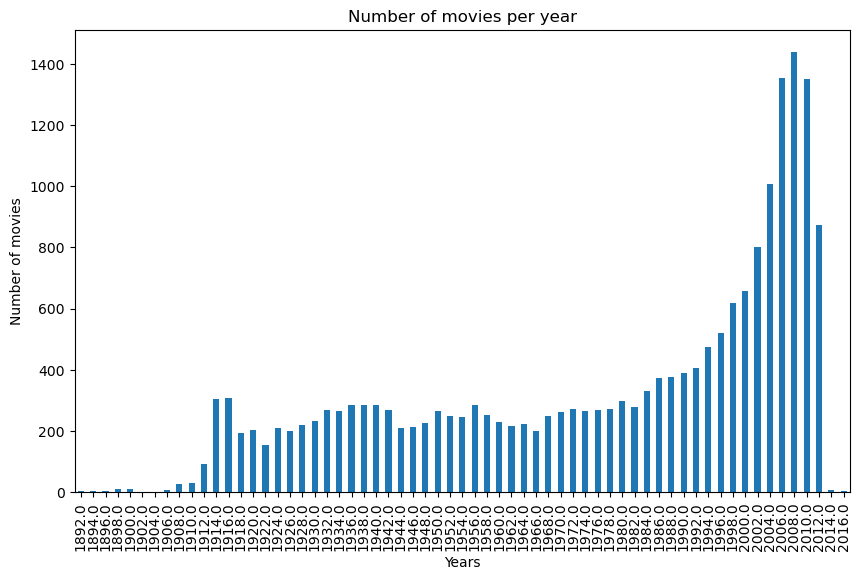

In [150]:
# Temporal reparition of movies

# Convert the "Movie release date" column to datetime and extract the year (as the format of year is not uniform through the column)
movies_df['year'] = pd.to_datetime(movies_df['Movie_release_date'], errors='coerce').dt.year

# Group by year and count the number of movies per year
movies_per_year = movies_df.groupby('year').size()

# Filter the years to keep only those that are multiples of 2
movies_per_year = movies_per_year[movies_per_year.index % 2 == 0]

# Plot the number of movies per year
plt.figure(figsize=(10, 6))
movies_per_year.plot(kind='bar')
plt.title('Number of movies per year')
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.show()

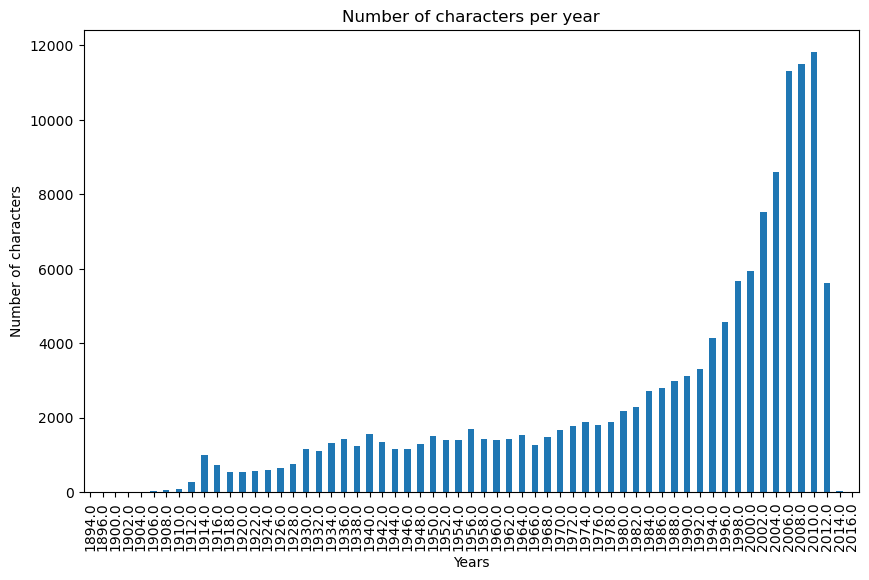

In [151]:
# Temporal reparition of characters

# Convert the "Movie release date" column to datetime and extract the year (as the format of year is not uniform through the column)
characters_df['year'] = pd.to_datetime(characters_df['Movie_release_date'], errors='coerce').dt.year

# Group by year and count the number of characters per year
characters_per_year = characters_df.groupby('year').size()

# Filter the years to keep only those that are multiples of 2
characters_per_year = characters_per_year[characters_per_year.index % 2 == 0]

# Plot the number of movies per year
plt.figure(figsize=(10, 6))
characters_per_year.plot(kind='bar')
plt.title('Number of characters per year')
plt.xlabel('Years')
plt.ylabel('Number of characters')
plt.show()

> **Conclusion**
> -  It now seems clear that the distribution of films and characters is not regular over the years.
> - We can see a clear, relatively logarithmic increase in the number of films until 2008, before a drop in the number of films. The same applies to characters, whose peak year is 2010, before a drop.

## *1.3 Repartition of the plot summary*

count    42304.000000
mean       310.733169
std        318.338062
min          2.000000
25%         87.000000
50%        187.000000
75%        454.000000
max       4929.000000
Name: word_count, dtype: float64


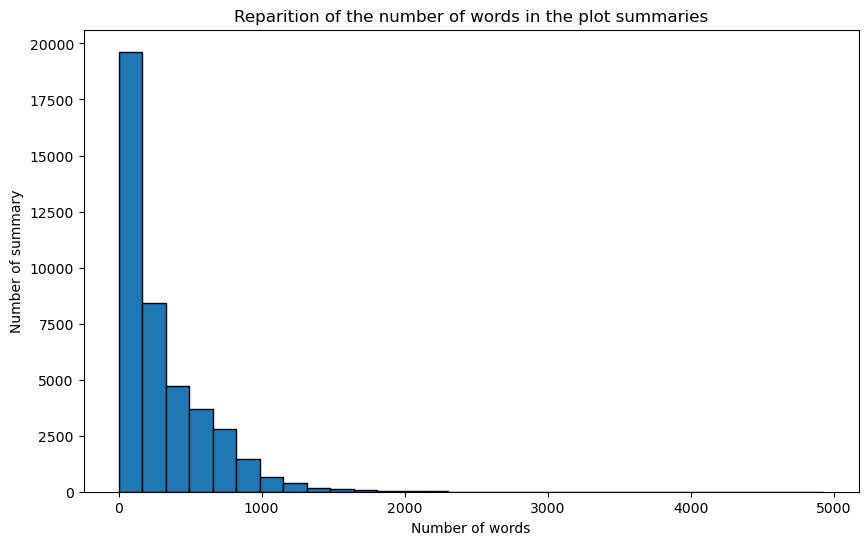

In [152]:
# Add a new column with the number of words for each summary
plot_summary_df['word_count'] = plot_summary_df['plot_summary'].apply(lambda x: len(str(x).split()))

# Display the first lines of the DataFrame
# print(plot_summary_df.head())

# Calculate the descriptive statistics
plot_summary_stats = plot_summary_df['word_count'].describe()
print(plot_summary_stats)

# Create a new column with the number of words for each summary
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(plot_summary_df['word_count'], bins=30, edgecolor='black')
plt.title('Reparition of the number of words in the plot summaries')
plt.xlabel('Number of words')
plt.ylabel('Number of summary')
plt.show()


In [153]:
# Identification of the first peak limits
# As the biggest peak is in the first bins, we will consider the first two bins as the limits of the first peak
first_peak_start = bins[0]
first_peak_end = bins[1]

# Counting of the number of movies in the first peak
first_peak_count = plot_summary_df[(plot_summary_df['word_count'] >= first_peak_start) & (plot_summary_df['word_count'] < first_peak_end)].shape[0]
percentage_first_peak = first_peak_count / plot_summary_df_size * 100
print(f"Number of movies in the first peak : {percentage_first_peak}%")

Number of movies in the first peak : 46.40459531013616%


> **Conclusion**
> -  As the median is 187 and the mean is 310, we don't have a relative symmetric distribution. As the mean is bigger than the median, we maybe have some summaries that are particularly bigger and that make the mean up.
> - As the standard deviation is 318, which is quiet big, there is a big variation in the length of plot summaries.
> - The min and max values indicate that there are some plot summaries that are very small and big respectively.
> - Graphically, the histogram shows a big peak, indicating that most of plot summaries have a similar length. More precisely, 46.75% of the movies have a summary between 4 to 168 words.

# *1.4 Repartition of movie production per country*

In [154]:
# Number of countries that have been produced movies
unique_countries = movies_df['Movie_countries'].nunique()

print(f"Number of countries that have been produced movies : {unique_countries}")

# Number of american movies
american_movies = movies_df[movies_df['Movie_countries']=='{"/m/09c7w0": "United States of America"}']
number_of_american_movies = len(american_movies)
print(f"Number of american movies : {number_of_american_movies}")

# Number of japan movies
japan_movies = movies_df[movies_df['Movie_countries']=='{"/m/03_3d": "Japan"}']
number_of_japan_movies = len(japan_movies)
print(f"Number of japan movies : {number_of_japan_movies}")

# Number of indian movies
indian_movies = movies_df[movies_df['Movie_countries']=='{"/m/03rk0": "India"}']
number_of_indian_movies = len(indian_movies)
print(f"Number of indian: {number_of_indian_movies}")

Number of countries that have been produced movies : 2124
Number of american movies : 30300
Number of japan movies : 2242
Number of indian: 8240
